You are exploring the wilderness of _Mushroomia_, a land populated by a plethora of diverse fauna and flora. In particular, _Mushroomia_ is known for its unparalleled variety in mushrooms. However, not all the mushrooms in _Mushroomia_ are edible. As you make your way through _Mushroomia_, you would like to know which mushrooms are edible, in order to forage for supplies for your daily mushroom soup.

You have access to:
* _Shroomster Pro Max <sup>TM</sup>_ - a state of the art data collection device, developed by _Mushroomia_, that allows you to collect various data points about any mushroom you encounter in the wild
* _The National Archives on Mushrooms_ - a dataset collected over the years by the government of _Mushroomia_

To address this problem, you decide to use the skills you learnt in CSM148 and train machine learning models on the _The National Archives on Mushrooms_ in order to use your _Shroomster Pro Max <sup>TM</sup>_ to determine whether the mushrooms you encounter on your adventure can be added to your daily mushroom soup.  

This project will be more unstructured than the previous two projects in order to allow you to experience how data science problems are solved in practice. There are two parts to this project: a Jupyter Notebook with your code (where you explore, visualize, process your data and train machine learning models) and a report (where you explain the various choices you make in your implementation and analyze the final performance of your models).

# 1. Loading and Viewing Data



In [843]:
# import pandas as pd
# pd.read_csv(...)
# note delimitter for this file is semi-colon (;) not comma

import pandas as pd
train_data = pd.read_csv("mushroom_train.csv", sep = ";")
test_data = pd.read_csv("mushroom_test.csv", sep = ";")
print(train_data.shape)
print(test_data.shape)

(50213, 21)
(10856, 21)


In [844]:
print(train_data.head())

  class  cap-diameter cap-shape cap-surface cap-color does-bruise-or-bleed  \
0     p         15.26         x           g         o                    f   
1     p         16.60         x           g         o                    f   
2     p         14.07         x           g         o                    f   
3     p         14.17         f           h         e                    f   
4     p         14.64         x           h         o                    f   

  gill-attachment gill-spacing gill-color  stem-height  ...  stem-root  \
0               e          NaN          w        16.95  ...          s   
1               e          NaN          w        17.99  ...          s   
2               e          NaN          w        17.80  ...          s   
3               e          NaN          w        15.77  ...          s   
4               e          NaN          w        16.53  ...          s   

  stem-surface stem-color veil-type veil-color has-ring ring-type  \
0            y   

In [848]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50213 entries, 0 to 50212
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 50213 non-null  object 
 1   cap-diameter          50213 non-null  float64
 2   cap-shape             50213 non-null  object 
 3   cap-surface           37915 non-null  object 
 4   cap-color             50213 non-null  object 
 5   does-bruise-or-bleed  50213 non-null  object 
 6   gill-attachment       42447 non-null  object 
 7   gill-spacing          31064 non-null  object 
 8   gill-color            50213 non-null  object 
 9   stem-height           50213 non-null  float64
 10  stem-width            50213 non-null  float64
 11  stem-root             7413 non-null   object 
 12  stem-surface          19912 non-null  object 
 13  stem-color            50213 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

# 2. Splitting Data into Features and Labels

In [770]:
# Only keep features that shroomster can detect!

training = train_data.drop("class", axis=1)
train_labels = train_data["class"].copy()
testing = test_data.drop("class", axis=1) 
test_labels = test_data["class"].copy()

# 3. Data Exploration and Visualization

In [771]:
# Hint: We have done this in both project 1 & 2
%matplotlib inline
import matplotlib.pyplot as plt #plotting package
import seaborn as sns 
from pandas.plotting import scatter_matrix


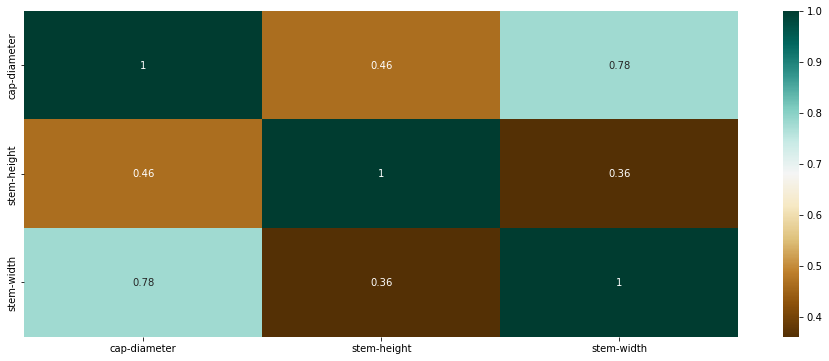

In [772]:
plt.figure(figsize=(16, 6)) 
sns.heatmap(train_data.corr(), annot=True,cmap='BrBG') 
plt.show()

array([[<AxesSubplot:title={'center':'cap-diameter'}>,
        <AxesSubplot:title={'center':'stem-height'}>],
       [<AxesSubplot:title={'center':'stem-width'}>, <AxesSubplot:>]],
      dtype=object)

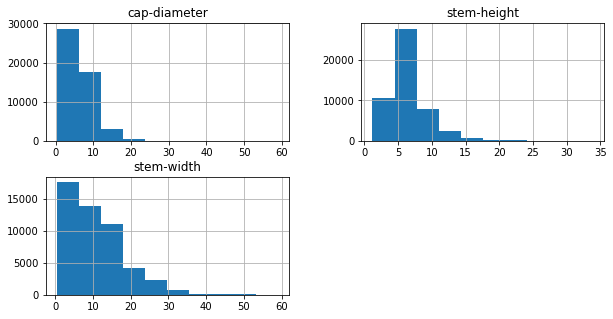

In [773]:
train_data.hist(figsize=(10,5))

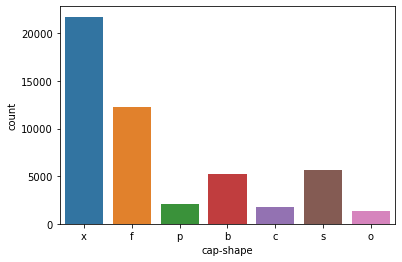

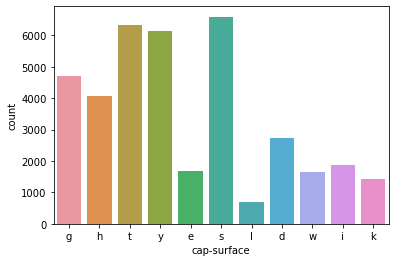

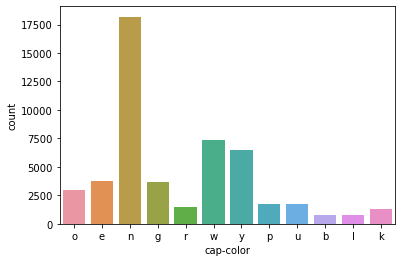

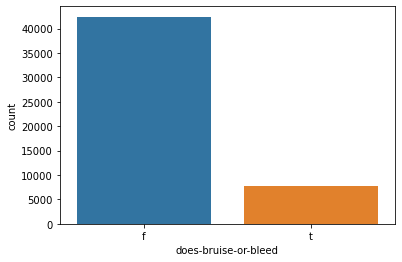

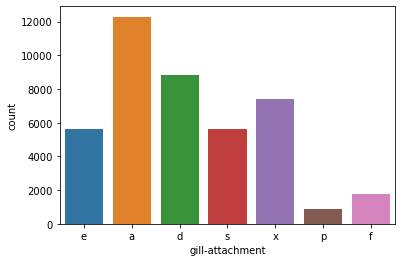

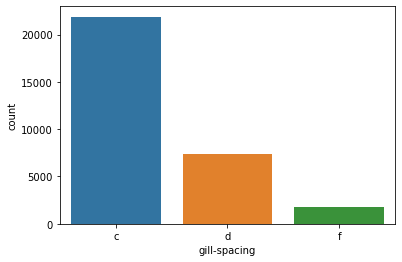

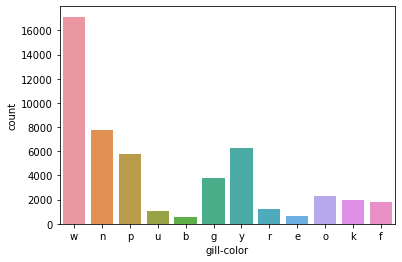

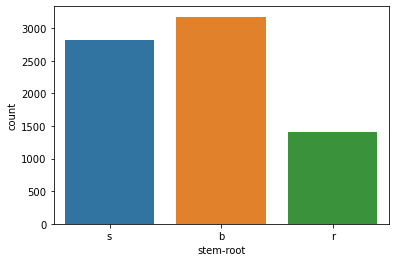

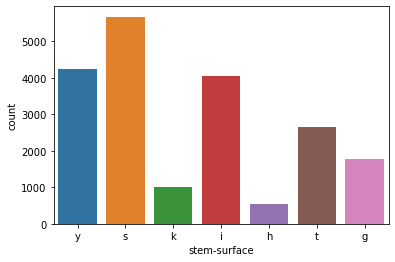

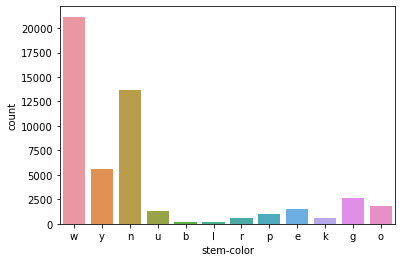

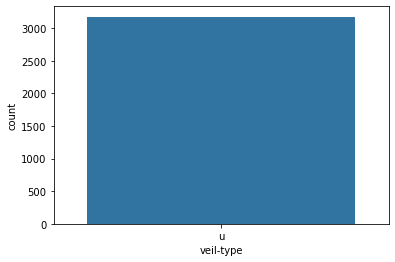

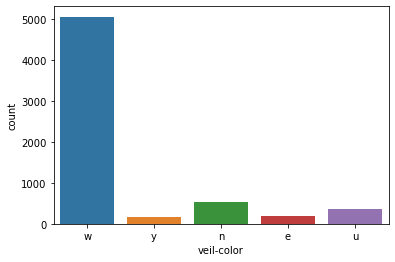

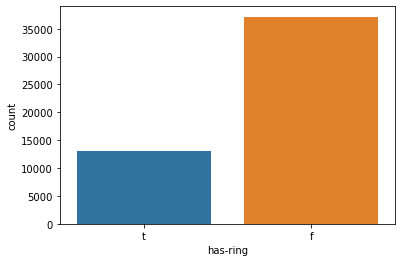

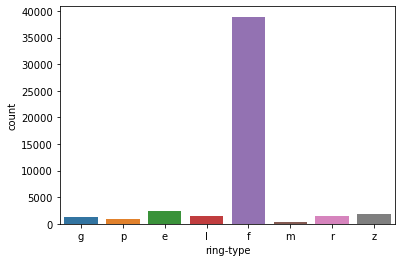

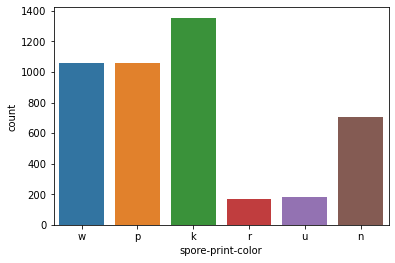

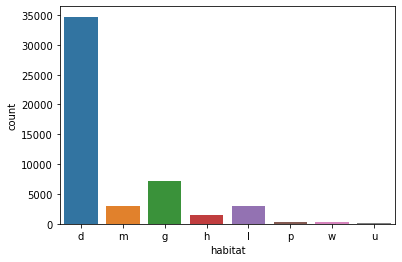

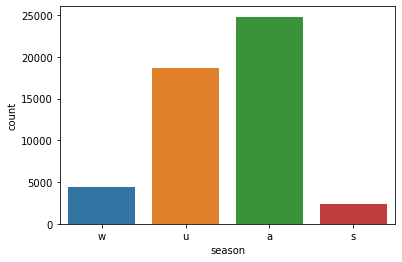

In [774]:
import seaborn as sns
numerical_features = ['cap-diameter','stem-height', 'stem-width']
cat = training.drop(['cap-diameter','stem-height', 'stem-width'], axis=1)
categorical_features = list(cat)
for i in categorical_features:
    
    sns.countplot(x=i,data=training)  
    plt.show()

    
    

    

(array([29242.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 20971.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

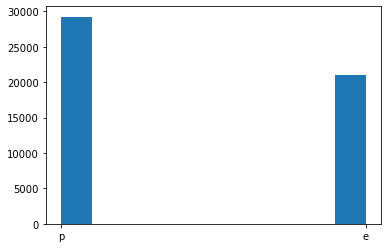

In [775]:
#sns.countplot(x='class',data=train_labels)  
plt.hist(train_labels)

# 5. Data Augmentation (Creating at least 2 New Features)

In [776]:
# Similar to Project 1 and 2. 
import numpy as np
import math

training['volume']= math.pi*pow(training['stem-width']/2,2)*training['stem-height']
training["cap-diameter_cat"] = pd.cut(training["cap-diameter"], bins=[-1., 3., 7., 10., np.inf],
                                  labels=[1, 2, 3, 4]) 

testing['volume']= math.pi*pow(testing['stem-width']/2,2)*testing['stem-height']
testing["cap-diameter_cat"] = pd.cut(testing["cap-diameter"], bins=[-1., 3., 7., 10., np.inf],
                                  labels=[1, 2, 3, 4])

print(training["cap-diameter_cat"].value_counts())

print(training)


2    22030
3    10671
1    10559
4     6953
Name: cap-diameter_cat, dtype: int64
       cap-diameter cap-shape cap-surface cap-color does-bruise-or-bleed  \
0             15.26         x           g         o                    f   
1             16.60         x           g         o                    f   
2             14.07         x           g         o                    f   
3             14.17         f           h         e                    f   
4             14.64         x           h         o                    f   
...             ...       ...         ...       ...                  ...   
50208          1.18         s           s         y                    f   
50209          1.27         f           s         y                    f   
50210          1.27         s           s         y                    f   
50211          1.24         f           s         y                    f   
50212          1.17         s           s         y                    f   

      

# 4. Data Processing

In [777]:
# Hints:
# 1. Convert the "class" column into labels: 'p' (poisonous) -> 0,  'e' (edible) -> 1 
# 2. You can drop columns if you see fit
# 3. See any imcomplete data? We learned how to deal with them in project 1.

# from sklearn.pipeline import ...
# from sklearn.preprocessing import ...
# from sklearn.compose import ...


# p->0, e->1
train_labels = [0 if x == "p" else 1 for x in train_labels]
print(train_labels.count(0))
print(train_labels.count(1))
test_labels = [0 if x == "p" else 1 for x in test_labels]

29242
20971


In [778]:
#incomplete/drop
print(training.shape)
print(training.isnull().sum()) 

# should drop "stem-root", "stem-surface", "veil-type", "veil-color", "spore-print-color"

(50213, 22)
cap-diameter                0
cap-shape                   0
cap-surface             12298
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          7766
gill-spacing            19149
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               42800
stem-surface            30301
stem-color                  0
veil-type               47036
veil-color              43916
has-ring                    0
ring-type                1765
spore-print-color       45681
habitat                     0
season                      0
volume                      0
cap-diameter_cat            0
dtype: int64


In [779]:
# should drop "stem-root", "stem-surface", "veil-type", "veil-color", "spore-print-color"
training = training.drop(['stem-root', 'stem-surface', 'veil-type', 'veil-color', 'spore-print-color'], axis=1)
testing = testing.drop(['stem-root', 'stem-surface', 'veil-type', 'veil-color', 'spore-print-color'], axis=1)


In [780]:
print(training.shape)
print(training.isnull().sum()) 


(50213, 17)
cap-diameter                0
cap-shape                   0
cap-surface             12298
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          7766
gill-spacing            19149
gill-color                  0
stem-height                 0
stem-width                  0
stem-color                  0
has-ring                    0
ring-type                1765
habitat                     0
season                      0
volume                      0
cap-diameter_cat            0
dtype: int64


In [781]:
training['cap-surface'].fillna(training['cap-surface'].mode()[0], inplace=True)
training['gill-attachment'].fillna(training['gill-attachment'].mode()[0], inplace=True)
training['gill-spacing'].fillna(training['gill-spacing'].mode()[0], inplace=True)
training['ring-type'].fillna(training['ring-type'].mode()[0], inplace=True)

testing['cap-surface'].fillna(training['cap-surface'].mode()[0], inplace=True)
testing['gill-attachment'].fillna(training['gill-attachment'].mode()[0], inplace=True)
testing['gill-spacing'].fillna(training['gill-spacing'].mode()[0], inplace=True)
testing['ring-type'].fillna(training['ring-type'].mode()[0], inplace=True)

print(training.shape)
print(training.isnull().sum()) 
print(testing.shape)
print(testing.isnull().sum())

(50213, 17)
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
volume                  0
cap-diameter_cat        0
dtype: int64
(10856, 17)
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
volume                  0
cap-diameter_cat        0
dtype: int64


In [816]:
#pipeline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler())
])
numerical_features = ['cap-diameter','stem-height', 'stem-width','volume']
cat = training.drop(['cap-diameter','stem-height', 'stem-width','volume'], axis=1)
categorical_features = list(cat)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, numerical_features),
    ("cat", OneHotEncoder(categories='auto', handle_unknown='ignore'), categorical_features),])


In [817]:
prepared_train = full_pipeline.fit_transform(training).toarray()

prepared_test = full_pipeline.transform(testing).toarray()


# 6.  Logistic Regression & Statistical Hypothesis Testing

In [834]:
# from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
clf = LogisticRegression(solver='liblinear').fit(prepared_train, train_labels) 
pred = clf.predict(prepared_test)

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(test_labels, pred)))

Accuracy:    0.510962


In [835]:
print("Accuracy score:",metrics.accuracy_score(test_labels, pred)) 
print("Precision score:",metrics.precision_score(test_labels, pred)) 
print("Recall score:",metrics.recall_score(test_labels, pred)) 
print("F1 score:",metrics.f1_score(test_labels, pred))

Accuracy score: 0.5109616801768607
Precision score: 0.8041863605671843
Recall score: 0.19178743961352657
F1 score: 0.30971265115069563


In [827]:
# see which ones are numeric values
prepared_train[0]

array([1.98454605, 3.21243332, 0.81689852, 1.69135278, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 1.     

In [821]:
# the first four columns are numerical features
prepared_train[:, 0:4]

array([[ 1.98454605,  3.21243332,  0.81689852,  1.69135278],
       [ 2.27953735,  3.53524606,  0.9589272 ,  2.16352485],
       [ 1.72257617,  3.47627065,  0.90082456,  1.99826538],
       ...,
       [-1.09525116, -0.85066168, -0.5672355 , -0.5678981 ],
       [-1.10185544, -0.94378074, -0.6873143 , -0.59206199],
       [-1.11726543, -1.04000376, -0.68602313, -0.59621867]])

In [837]:
# only use numerical features to do statistical hypothesis testing
import statsmodels.api as sm
sm_x = sm.add_constant(prepared_train[:, 0:4])
pred = sm.Logit(train_labels, sm_x)
results_stats = pred.fit()
print(results_stats.summary())
results_stats.pvalues

Optimization terminated successfully.
         Current function value: 0.661995
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                50213
Model:                          Logit   Df Residuals:                    50208
Method:                           MLE   Df Model:                            4
Date:                Fri, 03 Mar 2023   Pseudo R-squ.:                 0.02579
Time:                        16:32:49   Log-Likelihood:                -33241.
converged:                       True   LL-Null:                       -34121.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3387      0.009    -36.715      0.000      -0.357      -0.321
x1             0.4250      0.

array([4.19907437e-295, 2.33419064e-103, 1.81640552e-015, 2.49283250e-025,
       1.82014874e-066])

# 7. Dimensionality Reduction using PCA



In [808]:
# PCA: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_train = pca.fit_transform(prepared_train)
pca_test = pca.transform(prepared_test)


In [809]:
pca_train.shape

(50213, 2)

In [810]:
pca_test.shape

(10856, 2)

In [824]:
clfn = LogisticRegression().fit(pca_train, train_labels) 
pred = clfn.predict(pca_test)

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(test_labels, pred)))

Accuracy:    0.488301


In [825]:
print("Accuracy score:",metrics.accuracy_score(test_labels, pred)) 
print("Precision score:",metrics.precision_score(test_labels, pred)) 
print("Recall score:",metrics.recall_score(test_labels, pred)) 
print("F1 score:",metrics.f1_score(test_labels, pred))

Accuracy score: 0.48830140014738393
Precision score: 0.5947901591895803
Recall score: 0.3309178743961353
F1 score: 0.42524573202276256


# 8. Experiment with any 2 other models (Non-Ensemble)

In [792]:
# Models: https://scikit-learn.org/stable/supervised_learning.html

In [813]:
# Decision Tree
from sklearn import tree
tree_clf = tree.DecisionTreeClassifier().fit(pca_train, train_labels)
pred = tree_clf.predict(pca_test)

print("Accuracy score:",metrics.accuracy_score(test_labels, pred)) 
print("Precision score:",metrics.precision_score(test_labels, pred)) 
print("Recall score:",metrics.recall_score(test_labels, pred)) 
print("F1 score:",metrics.f1_score(test_labels, pred))

Accuracy score: 0.5956153279292558
Precision score: 0.699648968845985
Recall score: 0.5135265700483091
F1 score: 0.5923105497771174


In [814]:
from sklearn import svm

svmclf = svm.SVC().fit(pca_train, train_labels)
pred = svmclf.predict(pca_test)

print("Accuracy score:",metrics.accuracy_score(test_labels, pred)) 
print("Precision score:",metrics.precision_score(test_labels, pred)) 
print("Recall score:",metrics.recall_score(test_labels, pred)) 
print("F1 score:",metrics.f1_score(test_labels, pred))


Accuracy score: 0.5932203389830508
Precision score: 0.7303543913713405
Recall score: 0.4579710144927536
F1 score: 0.5629453681710214


# 9. Experiment with 1 Ensemble Method

In [849]:
# random forest
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier().fit(pca_train, train_labels)
pred = clf.predict(pca_test)
print("Accuracy score:",metrics.accuracy_score(test_labels, pred)) 
print("Precision score:",metrics.precision_score(test_labels, pred)) 
print("Recall score:",metrics.recall_score(test_labels, pred)) 
print("F1 score:",metrics.f1_score(test_labels, pred))

Accuracy score: 0.597457627118644
Precision score: 0.699048031155344
Recall score: 0.5202898550724637
F1 score: 0.5965657311669128


# 10. Cross-Validation & Hyperparameter Tuning for All 3 Models

In [796]:
# Cross-Validation: https://scikit-learn.org/stable/modules/cross_validation.html
# Hyperparameter Tuning: https://scikit-learn.org/stable/modules/grid_search.html

from sklearn.model_selection import KFold
from sklearn import model_selection
kf=KFold(n_splits=10, random_state=None, shuffle=False)
for train_index, test_index in kf.split(pca_train):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [ 5022  5023  5024 ... 50210 50211 50212] TEST: [   0    1    2 ... 5019 5020 5021]
TRAIN: [    0     1     2 ... 50210 50211 50212] TEST: [ 5022  5023  5024 ... 10041 10042 10043]
TRAIN: [    0     1     2 ... 50210 50211 50212] TEST: [10044 10045 10046 ... 15063 15064 15065]
TRAIN: [    0     1     2 ... 50210 50211 50212] TEST: [15066 15067 15068 ... 20084 20085 20086]
TRAIN: [    0     1     2 ... 50210 50211 50212] TEST: [20087 20088 20089 ... 25105 25106 25107]
TRAIN: [    0     1     2 ... 50210 50211 50212] TEST: [25108 25109 25110 ... 30126 30127 30128]
TRAIN: [    0     1     2 ... 50210 50211 50212] TEST: [30129 30130 30131 ... 35147 35148 35149]
TRAIN: [    0     1     2 ... 50210 50211 50212] TEST: [35150 35151 35152 ... 40168 40169 40170]
TRAIN: [    0     1     2 ... 50210 50211 50212] TEST: [40171 40172 40173 ... 45189 45190 45191]
TRAIN: [    0     1     2 ... 45189 45190 45191] TEST: [45192 45193 45194 ... 50210 50211 50212]


In [797]:
tree_kfold = model_selection.KFold(n_splits=15, random_state=42, shuffle=True)
tree_model_kfold=tree.DecisionTreeClassifier()
tree_params = [
    {
        'min_samples_split' : [50, 70, 100, 130],
        'splitter' : ['best', 'random'],
        'max_depth' : [ 10, 15, 20, 30, 40, 50, None]
    }
]
tree_clf = model_selection.GridSearchCV(estimator=tree_model_kfold, param_grid=tree_params, scoring = 'accuracy', 
                                  cv=tree_kfold, verbose = True)
tree_clf_fit=tree_clf.fit(pca_train, train_labels)
tree_model = tree_clf_fit.best_estimator_
print(tree_model)
print(tree_clf_fit.best_score_)

Fitting 15 folds for each of 56 candidates, totalling 840 fits
DecisionTreeClassifier(max_depth=30, min_samples_split=70, splitter='random')
0.7249312525931614


In [799]:
svm_kfold = model_selection.KFold(n_splits=5, random_state=42, shuffle=True)
svm_model_kfold=svm.SVC()
svm_params = [
    {
        'C' : [0.1, 1],
        'degree' : [1,3],
        'kernel' : ['linear', 'poly', 'rbf']
    }
]
svm_clf = model_selection.GridSearchCV(estimator=svm_model_kfold, param_grid=svm_params, scoring = 'accuracy', 
                                  cv=svm_kfold, verbose = True)
svm_clf_fit=svm_clf.fit(pca_train, train_labels)
best_model = svm_clf_fit.best_estimator_
print(best_model)
print(svm_clf_fit.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
SVC(C=1, degree=1)
0.67789211628


In [840]:
best_model.get_params()

{'C': 1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [800]:
kfold = model_selection.KFold(n_splits=5, random_state=42, shuffle=True)
rf_model_kfold = RandomForestClassifier()
params = [
    {
        'n_estimators' : [100,200,300],
        'max_depth' : [5,10,20, None],
        'min_samples_leaf' : [1,3,5]
    }
]
rf_clf = model_selection.GridSearchCV(estimator=rf_model_kfold, param_grid=params, scoring = 'accuracy', 
                                  cv=kfold, verbose = True)
rf_clf_fit=rf_clf.fit(pca_train, train_labels)
rf_best_model = rf_clf_fit.best_estimator_
print(rf_best_model)
print(rf_clf_fit.best_score_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
RandomForestClassifier(max_depth=10, n_estimators=300)
0.7325192808148622


In [841]:
rf_best_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# 11. Report Final Results 

In [801]:
# e.g. Accuracy, Precision etc.

pred = tree_model.predict(pca_test)

print("Accuracy score:",metrics.accuracy_score(test_labels, pred)) 
print("Precision score:",metrics.precision_score(test_labels, pred)) 
print("Recall score:",metrics.recall_score(test_labels, pred)) 
print("F1 score:",metrics.f1_score(test_labels, pred))


Accuracy score: 0.6200257921886514
Precision score: 0.7333781061114842
Recall score: 0.527536231884058
F1 score: 0.613655521213824


In [804]:
svm_pred = best_model.predict(pca_test)

print("Accuracy score:",metrics.accuracy_score(test_labels, svm_pred)) 
print("Precision score:",metrics.precision_score(test_labels, svm_pred)) 
print("Recall score:",metrics.recall_score(test_labels, svm_pred)) 
print("F1 score:",metrics.f1_score(test_labels, svm_pred))


Accuracy score: 0.5932203389830508
Precision score: 0.7303543913713405
Recall score: 0.4579710144927536
F1 score: 0.5629453681710214


In [803]:
rf_pred = rf_best_model.predict(pca_test)

print("Accuracy score:",metrics.accuracy_score(test_labels, rf_pred)) 
print("Precision score:",metrics.precision_score(test_labels, rf_pred)) 
print("Recall score:",metrics.recall_score(test_labels, rf_pred)) 
print("F1 score:",metrics.f1_score(test_labels, rf_pred))


Accuracy score: 0.6137619749447311
Precision score: 0.7195732636620945
Recall score: 0.5322061191626409
F1 score: 0.6118670739609369
